In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import geopandas as gpd
from shapely.geometry import Point

# Общее
Максимально использовать Pandas и Plotly или Bokeh или GeoPandas (для визуализации карты Мира со странами). Применение излишних циклов ведет к снижению баллов (циклы - ЗЛО). Применение ненужных функций - аналогично. Используйте apply, map и lambda по максимуму. Помним про корректное применение сортировок.

Вспоминаем английский:

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## Задание 1 
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [2]:
airports = pd.read_csv('csv_airports_v1.csv')
routes = pd.read_csv('csv_routes_v1.csv')

## Задание 2. 
1. Вывести `info` по датафреймам.
2. Обратите внимание, что в `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменить их на стандартные `np.nan`
3. Повторно посмотреть `info` по датафреймам.

In [3]:
print('Исходные датафреймы')
airports.info()
routes.info()

airports.replace('\\N', np.nan, inplace = True)

print('Получившиеся датафреймы')
airports.info()
routes.info()

Исходные датафреймы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  7697 non-null   object 
 5   ICAO                  7697 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7697 non-null   object 
 10  DST                   7697 non-null   object 
 11  Tz database timezone  7697 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total

## Задание 3. 
1. Срезать данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, отвяжите новую табличку от `airports`
2. В `iata_arports` добавьте столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии). 

In [4]:
airports_copy = airports.copy()
iata_airports = airports_copy[airports_copy['IATA'].notna()]

In [5]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None

iata_airports['Continents'] = iata_airports['Country'].map(country_to_continent)

C:\Users\sotok\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
C:\Users\sotok\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
C:\Users\sotok\AppData\Local\Temp\ipykernel_16140\1738272322.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iata_airports['Continents'] = iata_airports['Country'].map(country_to_continent)


In [6]:
# iata_airports[iata_airports['Continents'].isna()]['Country'].unique()
continents_list = {"Cote d'Ivoire" : 'Africa', 'Congo (Brazzaville)' : 'Africa', 'Congo (Kinshasa)' : 'Africa',
       'Saint Helena' : 'Africa', 'Reunion' : 'Africa', 'Midway Islands' : 'North America', 'Antarctica' : 'Antarctica',
       'Virgin Islands' : 'North America', 'Netherlands Antilles' : 'North America', 'Burma' : 'Asia', 'East Timor' : 'Asia',
       'Johnston Atoll' : 'Oceania', 'Western Sahara' : 'Africa', 'Wake Island' : 'Oceania'}
def replace_continents(row):
    if pd.isnull(row['Continents']):
        return continents_list.get(row['Country'])
    return row['Continents']

iata_airports['Continents'] = iata_airports.apply(replace_continents, axis=1)
iata_airports.reset_index(drop=True, inplace=True)

C:\Users\sotok\AppData\Local\Temp\ipykernel_16140\2764893195.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iata_airports['Continents'] = iata_airports.apply(replace_continents, axis=1)


## Задание 4.
Реализовать случайный выбор континента и на карте Мира нанести точки аэропортов `iata_airports` для выбранного континента.

Реализуйте все континенты на отдельных `subplots`.
Нашли обшибки в данных, если да то какие?

In [7]:
continents = iata_airports['Continents'].unique()

In [21]:
import random
random_continent = random.choice(continents)
random_continent

'North America'

C:\Users\sotok\AppData\Local\Temp\ipykernel_16140\2991071811.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


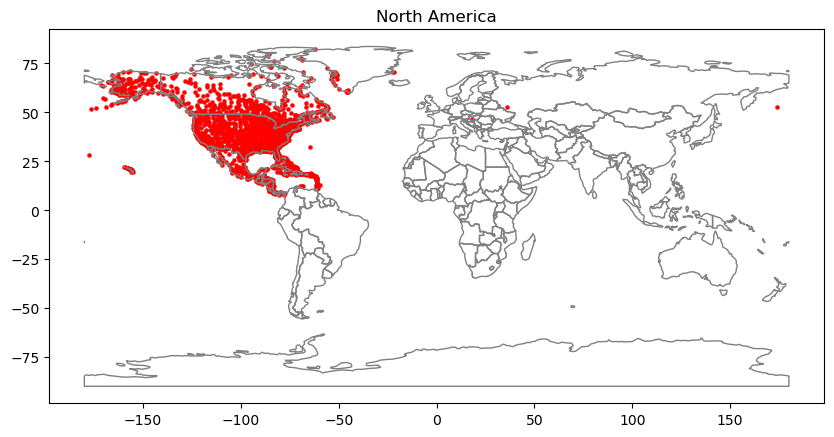

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data = iata_airports[iata_airports['Continents'] == random_continent]
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))
fig, ax = plt.subplots(figsize=(10, 10))
world.boundary.plot(ax=ax, color='grey', linewidth=1)
gdf.plot(ax=ax, color='red', markersize=5)
plt.title(random_continent)
plt.show();

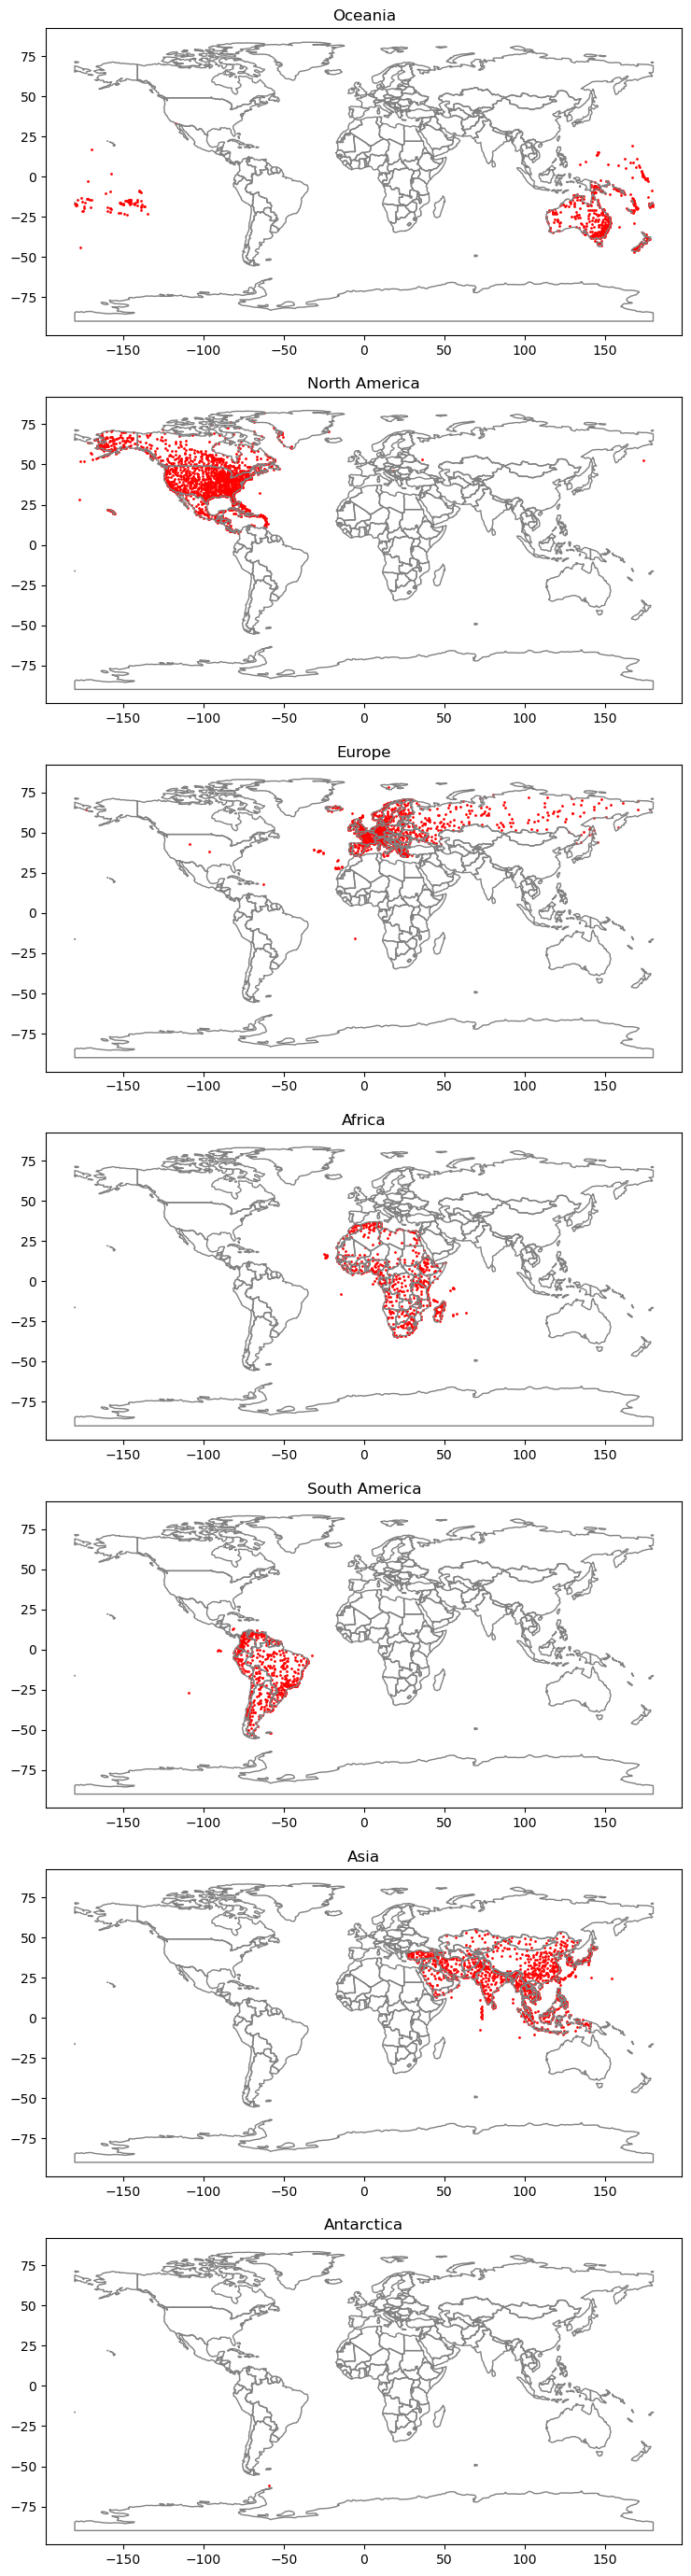

In [23]:
fig, axs = plt.subplots(7, 1, figsize=(10, 35))
for idx, continent_name in enumerate(continents):
    ax = axs[idx]
    data = iata_airports[iata_airports['Continents'] == continent_name]
    gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))
    world.boundary.plot(ax=ax, color='grey', linewidth=1)
    gdf.plot(ax=ax, color='red', markersize=1)
    ax.set_title(continent_name)
plt.show();


## Да, ошибки в данных есть. Это хорошо видно, если отмечать аэропорты одного континента на карте мира. (Например, если отмечать аэропорты для Северной Америки, то пара точек попадёт на теорриторию Европы)

## Задание 5.
1. На основе таблиц `iata_arports` и `routes` рассчитать количество взлетов и посадок для каждой страны случайно выбранного континента собрать таблицу: индексы - страна, колонки - взеты и посадки. Упорядочить по названию страны.
2. Используя собранные данные - залить страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет черный или белый цвет (как вам нравится).

In [24]:
routes.replace('\\N', np.nan, inplace = True)
source = routes.pivot_table(index='Source airport ID', values='Airline', aggfunc='count')
destination = routes.pivot_table(index='Destination airport ID', values='Airline', aggfunc='count')
s_and_d = source.merge(destination, left_index=True, right_index=True, how='outer')
s_and_d.index = s_and_d.index.astype(int)
merged = iata_airports.merge(s_and_d, how='left', left_on='Airport ID', right_index=True).rename(columns={'Airline_x':'Source', 'Airline_y':'Destination'})
table1 = merged[merged['Continents'] == random_continent][['Country', 'Source', 'Destination']].groupby('Country').sum()
table1

,Source,Destination
Country,,
Anguilla,6.0,6.0
Antigua and Barbuda,35.0,34.0
Aruba,44.0,46.0
Bahamas,143.0,144.0
Barbados,23.0,23.0
Belize,39.0,39.0
Bermuda,15.0,15.0
British Virgin Islands,16.0,16.0
Canada,1841.0,1850.0


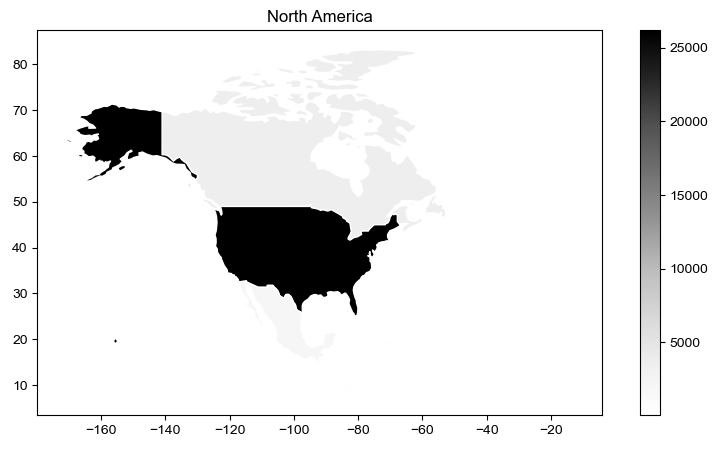

In [25]:
table1['s_d'] = table1['Source'] + table1['Destination']
names_dict = {'Western Sahara':'W. Sahara', 'United States':'United States of America', 'Congo (Kinshasa)':'Dem. Rep. Congo', 'Dominican Republic':'Dominican Rep.', 'Falkland Islands':'Falkland Is.', 'East Timor':'Timor-Leste', "Cote d'Ivoire":"Côte d'Ivoire", 'Central African Republic':'Central African Rep.', 'Congo (Brazzaville)':'Congo', 'Equatorial Guinea':'Eq. Guinea', 'Solomon Islands':'Solomon Is.', 'Czech Republic':'Czechia', 'Bosnia and Herzegovina':'Bosnia and Herz.', 'Macedonia':'North Macedonia', 'South Sudan':'S. Sudan'}
table1.index = table1.index.map(lambda x: names_dict[x] if x in names_dict else x)
world_merged = world.merge(table1, left_on='name', right_on='Country', right_index=True, how='left')
fig, ax = plt.subplots(figsize=(10, 5))
wanted_continents = world_merged[world_merged['continent'] == random_continent]
wanted_continents.plot(column='s_d', cmap='Greys', legend=True, ax=ax)
plt.title(random_continent)
sns.set_style(style='dark')
plt.show();

## Задание 6.
Для каждого континента найти 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

Нанести на карту Мира данные аэропорты разным цветом в зависимости от континента.

In [26]:
merged['s_and_d'] = merged['Source'] + merged['Destination']
def get_top_airports(group):
    return group.nlargest(10, columns='s_and_d')
top_airports_temp = merged.groupby('Continents').apply(get_top_airports).reset_index(drop=True)
top_airports = top_airports_temp.set_index(['Continents', 'Name of airport'])[['Country', 'City', 'IATA', 's_and_d']]
top_airports.loc['Oceania']

,Country,City,IATA,s_and_d
Name of airport,,,,
Sydney Kingsford Smith International Airport,Australia,Sydney,SYD,410.0
Brisbane International Airport,Australia,Brisbane,BNE,296.0
Melbourne International Airport,Australia,Melbourne,MEL,269.0
Auckland International Airport,New Zealand,Auckland,AKL,213.0
Perth International Airport,Australia,Perth,PER,182.0
Cairns International Airport,Australia,Cairns,CNS,110.0
Port Moresby Jacksons International Airport,Papua New Guinea,Port Moresby,POM,102.0
Adelaide International Airport,Australia,Adelaide,ADL,102.0
Darwin International Airport,Australia,Darwin,DRW,90.0


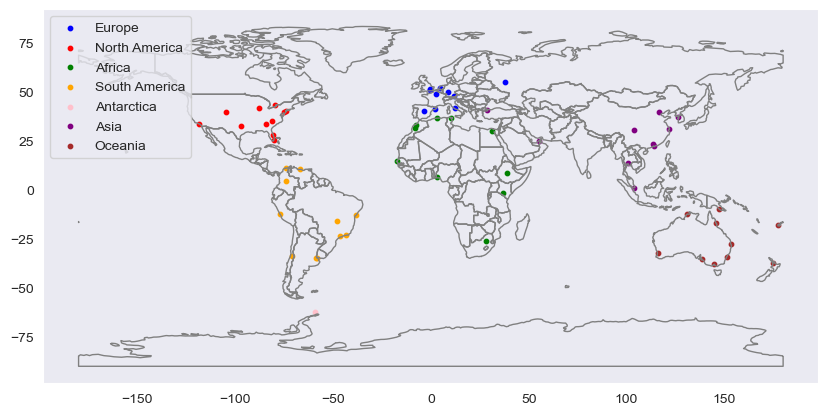

In [27]:
data_for_worldmap = top_airports.merge(iata_airports, left_on='Name of airport', right_on='Name of airport', how='left')[['Name of airport', 'Latitude', 'Longitude', 'Continents']]
gdf = gpd.GeoDataFrame(data_for_worldmap, geometry=gpd.points_from_xy(data_for_worldmap['Longitude'], data_for_worldmap['Latitude']))
fig, ax = plt.subplots(figsize=(10, 10))
world.boundary.plot(ax=ax, color='grey', linewidth=1)
for continent, color in {'Europe': 'blue', 'North America': 'red', 'Africa': 'green', 'South America': 'orange', 'Antarctica': 'pink', 'Asia': 'purple', 'Oceania': 'brown'}.items():
    gdf[gdf['Continents'] == continent].plot(ax=ax, color=color, label=continent, markersize=10, marker='o')
plt.legend()
plt.show()

## Задание 7.
В табличке `csv_routes_v1.csv` есть колонка `Equipment` - это код марки самолета в кодах IATA. Тут есть их расшифровка
https://en.wikipedia.org/wiki/List_of_aircraft_type_designators (если указаны два и более борта, считаем по перевому).

Найдите 10 самых популярных моделей самолетов, естественно с расшифровкой, с указанием количества рейсов выполняемых этими бортами (по числу посадок :)). Результат в виде датафрейма. Индекс номер по порядку, колонки - марка самолета и количество рейсов. Упорядочить от наибольшего количества рейсов вниз. 

In [28]:
url= 'https://en.wikipedia.org/wiki/List_of_aircraft_type_designators'
wik = pd.read_html(url)[0][['IATA type code', 'Model']]
wik.replace('—', np.nan, inplace = True)
wik.dropna(subset=['IATA type code'], inplace=True)

In [29]:
def wik_split(row):
    row = row.split('/')[0]
    row = row.split(',')[0]
    row = row.split('|')[0]
    return row
wik['Model'] = wik['Model'].apply(wik_split)
wik.drop_duplicates(subset='IATA type code', inplace=True) #чтобы не было мёрджа one-to-many

#### если в строке df из википедии перечислено несколько моделей (через слэш или запятую, то тоже оставляем первую? надеюсь, да)

In [30]:
routes.dropna(subset=['Equipment'], inplace=True)
def routes_split(row):
    row = row.split(' ')[0]
    return row
routes['Equipment'] = routes['Equipment'].apply(routes_split)

#### если в строке перечислено несколько марок, то оставляем первую названную: я так понимаю, потому что вот "(если указаны два и более борта, считаем по перевому)"

In [31]:
merged_equip = routes.merge(wik, left_on='Equipment', right_on='IATA type code', how='left')
merged_equip_table = merged_equip.pivot_table(index='Model', values='Destination airport', aggfunc='count')
top_models = merged_equip_table.nlargest(10, columns='Destination airport').reset_index()
top_models

,Model,Destination airport
0,Airbus A320,11865
1,Boeing 737-800,8520
2,Airbus A319,5205
3,Boeing 737-800 Winglets,2566
4,Aerospatiale,2412
5,Airbus A321,2145
6,Boeing 737-700 Winglets,1811
7,Embraer 190,1391
8,Airbus A330-300,1211
9,De Havilland Canada DHC-8-400 Dash 8Q,1097
